In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Import merged neighborhood-level dataset
allData = pd.read_csv('./data/analytic_dataset.csv')
# Streamline dataset to keep columns of interest for this analysis
keepCols = ['year', 'nta_name', 'borough', 'pct_attendance',
       'pct_chronically_absent', 'EVICTION_COUNT',
       'median_sale_price', 'hvi', 'total_population',
       'median_income', 'white_pct', 'black_pct',
       'american_indian_alaska_native_pct', 'asian_pct',
       'hawaiian_pacific_islander_pct', 'multiple_race_pct', 'other_race_pct']
data = allData[keepCols]

# Rename column for format
data.rename(columns={'EVICTION_COUNT': 'num_evictions'}, inplace=True)

# Drop rows with missing values
data = data.dropna()
# ANOVA tests for housing prices, eviction rates, school attendance for low, medium, high income neighborhoods

# Define income categories and assign to a new column
data['income_category'] = pd.qcut(data['median_income'], q=[0, 0.33, 0.67, 1], labels=['low', 'medium', 'high'])

# Define non-white population percentages
data['minority_pct'] = 100 - data['white_pct']

# Categorize as white/minority-dominated
data['minority_dominated'] = np.where(data['minority_pct'] > 50, "Yes", "No")

/tmp/ipykernel_1710649/3396616656.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'EVICTION_COUNT': 'num_evictions'}, inplace=True)


Text(0.5, 0.98, 'Pairplot of Key Variables by Borough')

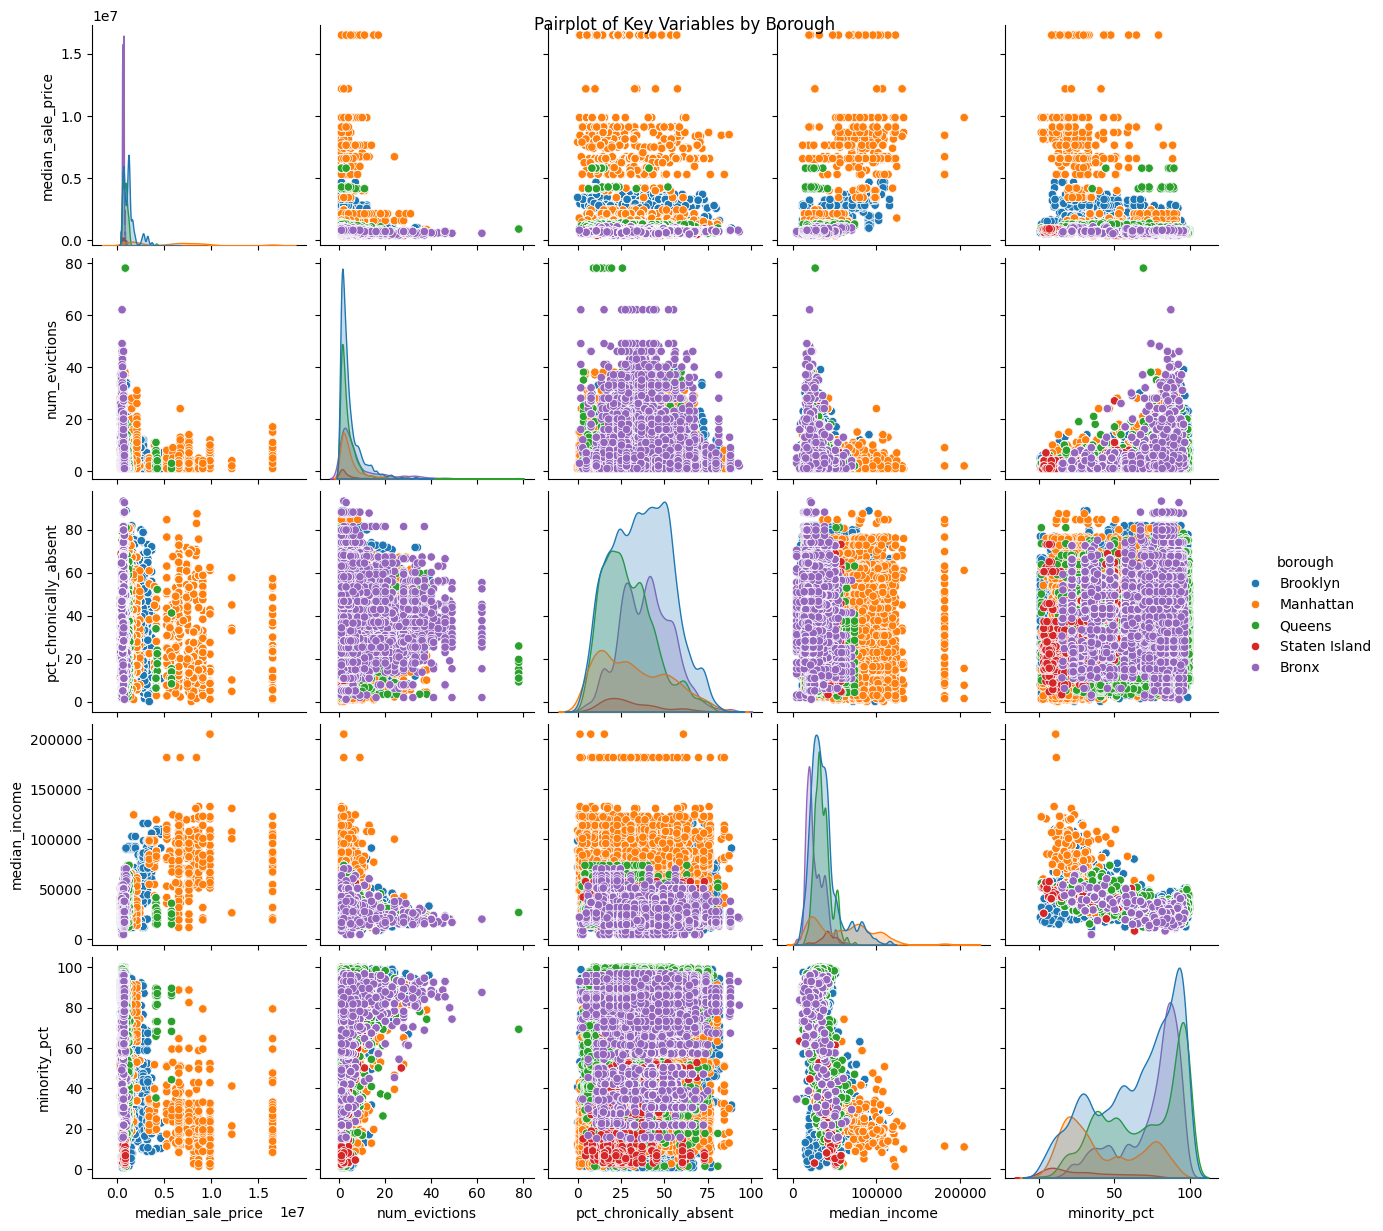

In [5]:
# Graphical
# May be redundant with the above, maybe add some pairplots
# Pairplot of key variables
sns.pairplot(data=data, vars=['median_sale_price', 'num_evictions', 'pct_chronically_absent', 'median_income', 'minority_pct'],
             hue='borough', diag_kind='kde')
plt.suptitle("Pairplot of Key Variables by Borough")



## explanation
In a pairplot, there is a large number of observations, but we can see the distributions of some of the variables:
- Median sale price is strongly right-skewed, indicating that there are many lower (relatively) priced homes, with long tails in each borough for the most expensive homes, in the scatter plots, sale price shows a relationship to income, and many of the higher priced homes are in Manhattan.
- The number of evictions is also a right skewed distribution, with relatively few evictions happening in most neighborhoods. In the scatter plots, it looks like there's a relationship with the minority percentage in the Brooklyn tracts.
- Percent of chronically absent childreen shows a mostly normal distribution, however the density is higher in Brooklyn, Queens, and the Bronx, and lower in Manhattan. In the scatter plots, Queens is an outlier, with a large number of evictions and relatively lower chronic absenteeism.
- Median income is right skewed, and shows a predictable relationship with both median sales price and evictions. Interestingly there is a cluster of tracts in Manhattan with high income and high percentages of chronically absent children, I strongly suspect that this is due to COVID-19, since we included 2020 data.
- Minority Percentage is left skewed, with the Bronx, Queens, and Brooklyn having larger proportions of minority residents. In the scatter plots, a slight relationship with evictions is visible in the Bronx, Brooklyn, and Queens, but only above about 20 total evictions.


In [ ]:

## Maps
## read in shapefile with tracts to map the data
import geopandas as gpd
nyc_tracts = gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2020_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")
nyc_tracts = nyc_tracts.to_crs(epsg=4326)
nyc_tracts = nyc_tracts[['geometry', 'GEOID']]
nyc_tracts['GEOID'] = nyc_tracts['GEOID'].astype(int)


# function to plot variable on map
def map_var(df, var, title, cmap='viridis', edgecolor='black'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    # merge the geodataframe with the cleaned dataframe
    df = nyc_tracts.merge(data_var, left_on='GEOID', right_on='GEOID', )
    nyc_tracts.plot(ax=ax, color='lightgrey', edgecolor=edgecolor)
    df.plot(column=var, cmap=cmap, ax=ax, edgecolor=edgecolor)
    ax.set_title(title)
    plt.show()


KeyError: 'GEOID'

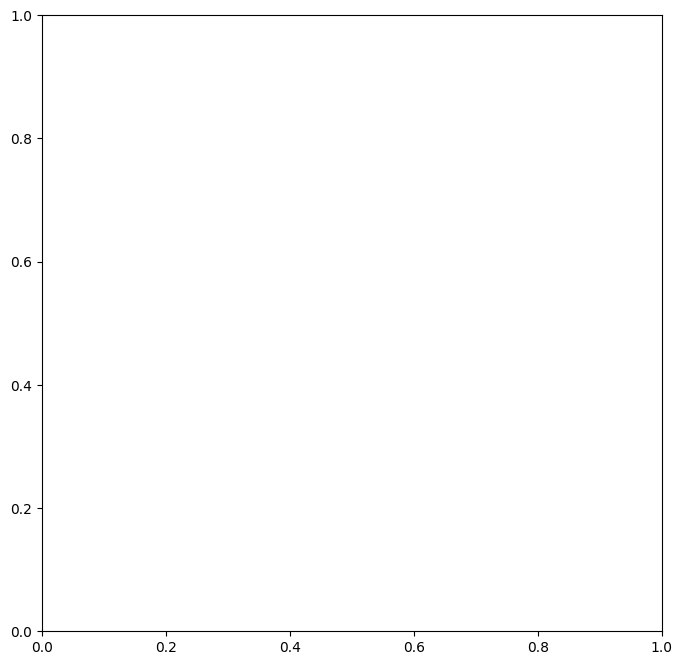

In [ ]:


for var in ['median_sale_price', 'num_evictions', 'pct_chronically_absent', 'median_income']:
    map_var(data, var, f"Average of {var}")
    plt.show()
